# MNIST with Pytorch


In [1]:
# load pytorch
import torch
from torch import nn, optim

torch.set_default_tensor_type('torch.FloatTensor')

# load numpy
import numpy as np

# load pyplot for displaying images
from matplotlib import pyplot as plt

# show images inline on notebook
%matplotlib inline

# for loading the training data
import os
import pickle
import gzip

## Load training data

In [2]:
# Data from http://deeplearning.net/data/mnist/mnist.pkl.gz--2018-07-25
PATH = 'data/'
FNAME = 'mnist.pkl.gz'

In [3]:
def load_mnist(filename):
     with gzip.open(filename, 'rb') as f:
            return pickle.load(f, encoding='latin-1')

In [4]:
((x_train, y_train), (x_valid, y_valid), (x_test, y_test)) = load_mnist(PATH+FNAME)

In [5]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [6]:
# turn data to pytorch format
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_valid = torch.from_numpy(x_valid)
y_valid = torch.from_numpy(y_valid)

## Normalize data

In [7]:
# calculate mean and standard deviation
mean = x_train.mean()
std = x_train.std()

# normalize training data
x_train = (x_train - mean) / std

# normalize validation data
x_valid = (x_valid-mean)/std

## Exploring the data

In [8]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None:
        plt.title(title)

In [9]:
valid_images = np.reshape(x_valid, (-1,28,28))

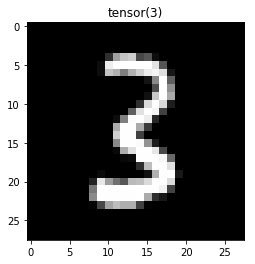

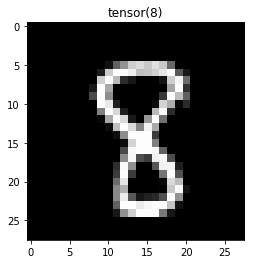

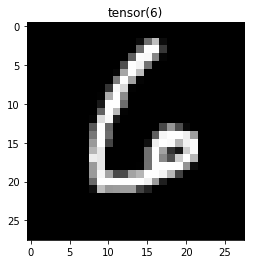

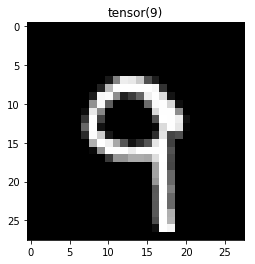

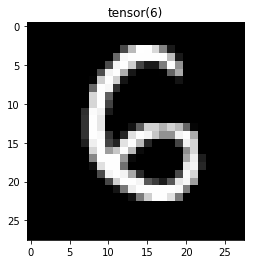

In [10]:
for i in range(5):
    show(valid_images[i], y_valid[i])
    plt.show()

## Start building the model

In [8]:
def get_layer(*dims):
    return nn.Parameter(torch.randn(dims)/dims[0])

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = get_layer(28*28, 10)
        self.bias = get_layer(10)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = (x @ self.layer1) + self.bias # linear layer
        x = self.softmax(x)
        return x    

criterion = nn.CrossEntropyLoss()

net = Net()

In [10]:
n_epochs = 5
batch_size = 128
learning_rate = 1e-1

for epoch in range(n_epochs):
    
    for i in range(0, len(x_train), batch_size):

        n = batch_size
        inputs = x_train[i:i+n]
        target = y_train[i:i+n]

        # forward propagation
        y_pred = net(inputs)
        loss = criterion(y_pred, target)
        
        # backpropagation
        loss.backward()
        
        net.layer1.data -= learning_rate * net.layer1.grad
        net.bias.data -= learning_rate * net.bias.grad
        
        net.layer1.grad.data.zero_()
        net.bias.grad.data.zero_()

    # calculate validation loss
    y_valid_pred = net(x_valid)
    loss_valid = criterion(y_valid_pred, y_valid)
    
    # calculate accuracy and validation accuracy
    accuracy = np.mean(y_pred.detach().numpy().argmax(axis=1) == target.detach().numpy())
    valid_accuracy = np.mean(y_valid_pred.detach().numpy().argmax(axis=1) == y_valid.detach().numpy())
    
    print(epoch, loss, loss_valid, accuracy, valid_accuracy)
    

0 tensor(1.6095) tensor(1.5805) 0.9 0.9078
1 tensor(1.5806) tensor(1.5655) 0.9125 0.914
2 tensor(1.5686) tensor(1.5589) 0.925 0.9174
3 tensor(1.5626) tensor(1.5549) 0.925 0.9198
4 tensor(1.5590) tensor(1.5521) 0.925 0.9211
